# Coding ideas
### Goal
Find if Zipf's Law exists in texts.

### Steps
#### 1. Preprocessing.
1. Read text files into python.
2. Tokenize and convert words to lowercase.
3. Remove punctuation and numbers.

In [34]:
import nltk


# Preprocess text
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove punctuation/numbers
    return words

#### 2. Get word frequencies and ranks of words.

In [35]:
from collections import Counter


# Compute word frequencies
def get_word_frequencies(words):
    return Counter(words)

#### I integrate the previous 2 steps in one function

In [36]:
import os


# Read and collect word frequencies from directory
def read_and_collect_frequencies_from_directory(directory_path):
    all_frequencies = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):  # Only read .txt files
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()  # Read the text file
                words = preprocess_text(text)  # Preprocess the text (tokenize, lowercase, remove punctuation)
                frequencies = get_word_frequencies(words)  # Get word frequencies
                all_frequencies.append((filename, frequencies))  # Store file name and its frequencies
    return all_frequencies

#### 3. Check Zipf's Law if exists by using Q-Q Plot
1. Get the theoretical Zipf's Law distribution.
2. Plot Q-Q Plot.

In [37]:
import matplotlib.pyplot as plt
import numpy as np


# Create theoretical Zipf distribution
def get_theoretical_zipf_distribution(num_words, s):
    ranks = np.arange(1, num_words + 1)
    theoretical_zipf = 1 / (ranks ** s)  # Theoretical Zipf distribution
    theoretical_zipf /= np.sum(theoretical_zipf)  # Normalize to make it a probability distribution
    return theoretical_zipf


# Get Q-Q Plot for each txt file, and set paremeter as 1.15
def plot_qq_for_zipf_law(all_frequencies, s, row, col):
    k = 0
    plt.figure(figsize=(18, 20))
    for filename, frequencies in all_frequencies:
        # Step 1: Get the word frequencies sorted in descending order
        word_counts = np.array([count for word, count in frequencies.most_common()])
        num_words = len(word_counts)
        all_words = np.sum(word_counts)

        print('Summary of ', filename, ':')
        print('Number of unique words: ', num_words)
        print('Number of all words: ', all_words)
        print('\n')

        # Step 2: Create the theoretical Zipf' Law distribution
        theoretical_zipf = get_theoretical_zipf_distribution(num_words, s)

        # Step 3: Normalize word counts to make them a probability distribution
        word_probabilities = word_counts / np.sum(word_counts)

        # Step 4: Get Quantiles (CMF)
        zipf_quantile = np.cumsum(theoretical_zipf)
        word_quantile = np.cumsum(word_probabilities)

        # Step 5: Generate the QQ plot
        k = k + 1
        plt.subplot(row, col, k)
        plt.scatter(zipf_quantile, word_quantile, alpha=0.6, label='Actual vs Theoretical')

        # Plot a reference line (y=x) to visualize deviation from Zipf' law
        max_val = max(max(zipf_quantile), max(word_quantile))
        plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

        plt.title(f'QQ Plot for Zipf Law - {filename}')
        plt.xlabel('Theoretical Quantiles (Zipf)')
        plt.ylabel('Actual Quantiles (Word Frequencies)')
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Experiments

In [38]:
AI_texts_path = '../Resources/GPT2-output'

AI_frequencies = read_and_collect_frequencies_from_directory(AI_texts_path)

Summary of  xl-1542M.train_part1.txt :
Number of unique words:  53064
Number of all words:  818046


Summary of  webtext.train_part1.txt :
Number of unique words:  40750
Number of all words:  832309


Summary of  large-762M.train_part1.txt :
Number of unique words:  54527
Number of all words:  817691


Summary of  xl-1542M.train_part2.txt :
Number of unique words:  53117
Number of all words:  818503


Summary of  webtext.train_part2.txt :
Number of unique words:  41202
Number of all words:  828063


Summary of  large-762M.train_part2.txt :
Number of unique words:  54275
Number of all words:  815590


Summary of  large-762M.train_part3.txt :
Number of unique words:  54316
Number of all words:  816684


Summary of  xl-1542M.train_part3.txt :
Number of unique words:  53148
Number of all words:  821007


Summary of  xl-1542M-k40.train_part1.txt :
Number of unique words:  26086
Number of all words:  882119


Summary of  xl-1542M-k40.train_part2.txt :
Number of unique words:  25638
Number of

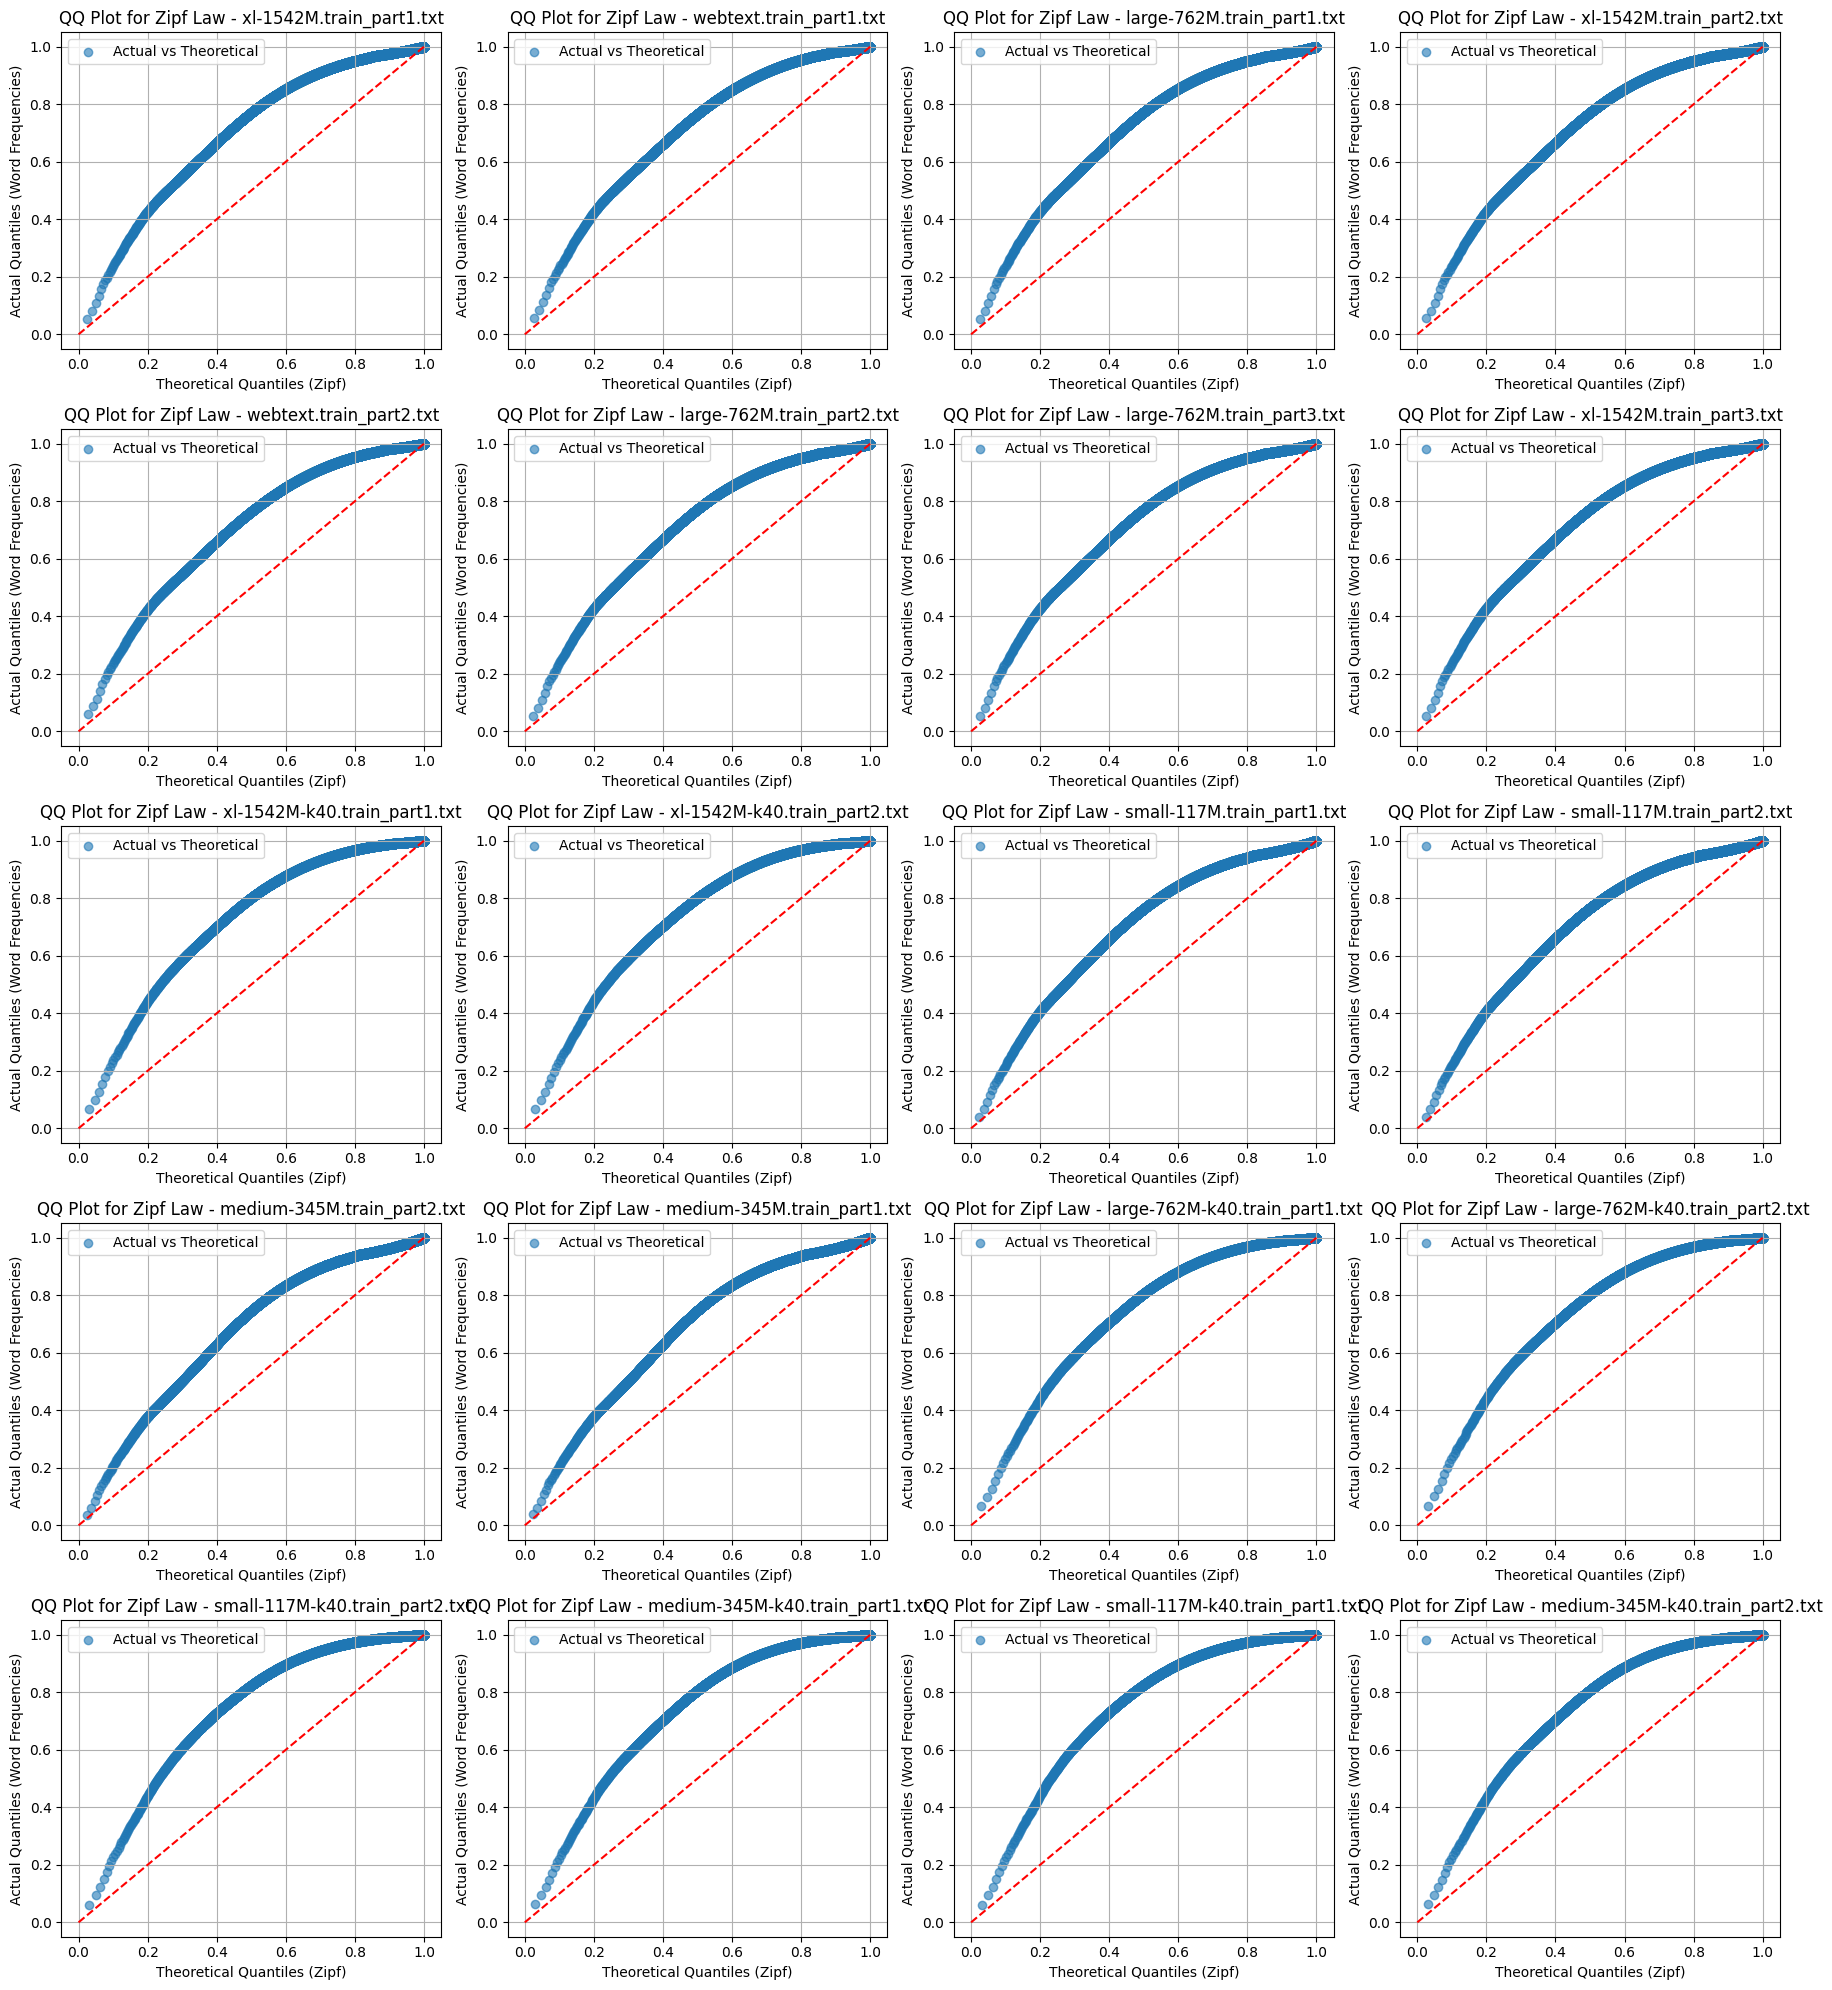

In [39]:
plot_qq_for_zipf_law(AI_frequencies, s=.8, row=5, col=4)  # You can change s by yourself to find the change

Summary of  xl-1542M.train_part1.txt :
Number of unique words:  53064
Number of all words:  818046


Summary of  webtext.train_part1.txt :
Number of unique words:  40750
Number of all words:  832309


Summary of  large-762M.train_part1.txt :
Number of unique words:  54527
Number of all words:  817691


Summary of  xl-1542M.train_part2.txt :
Number of unique words:  53117
Number of all words:  818503


Summary of  webtext.train_part2.txt :
Number of unique words:  41202
Number of all words:  828063


Summary of  large-762M.train_part2.txt :
Number of unique words:  54275
Number of all words:  815590


Summary of  large-762M.train_part3.txt :
Number of unique words:  54316
Number of all words:  816684


Summary of  xl-1542M.train_part3.txt :
Number of unique words:  53148
Number of all words:  821007


Summary of  xl-1542M-k40.train_part1.txt :
Number of unique words:  26086
Number of all words:  882119


Summary of  xl-1542M-k40.train_part2.txt :
Number of unique words:  25638
Number of

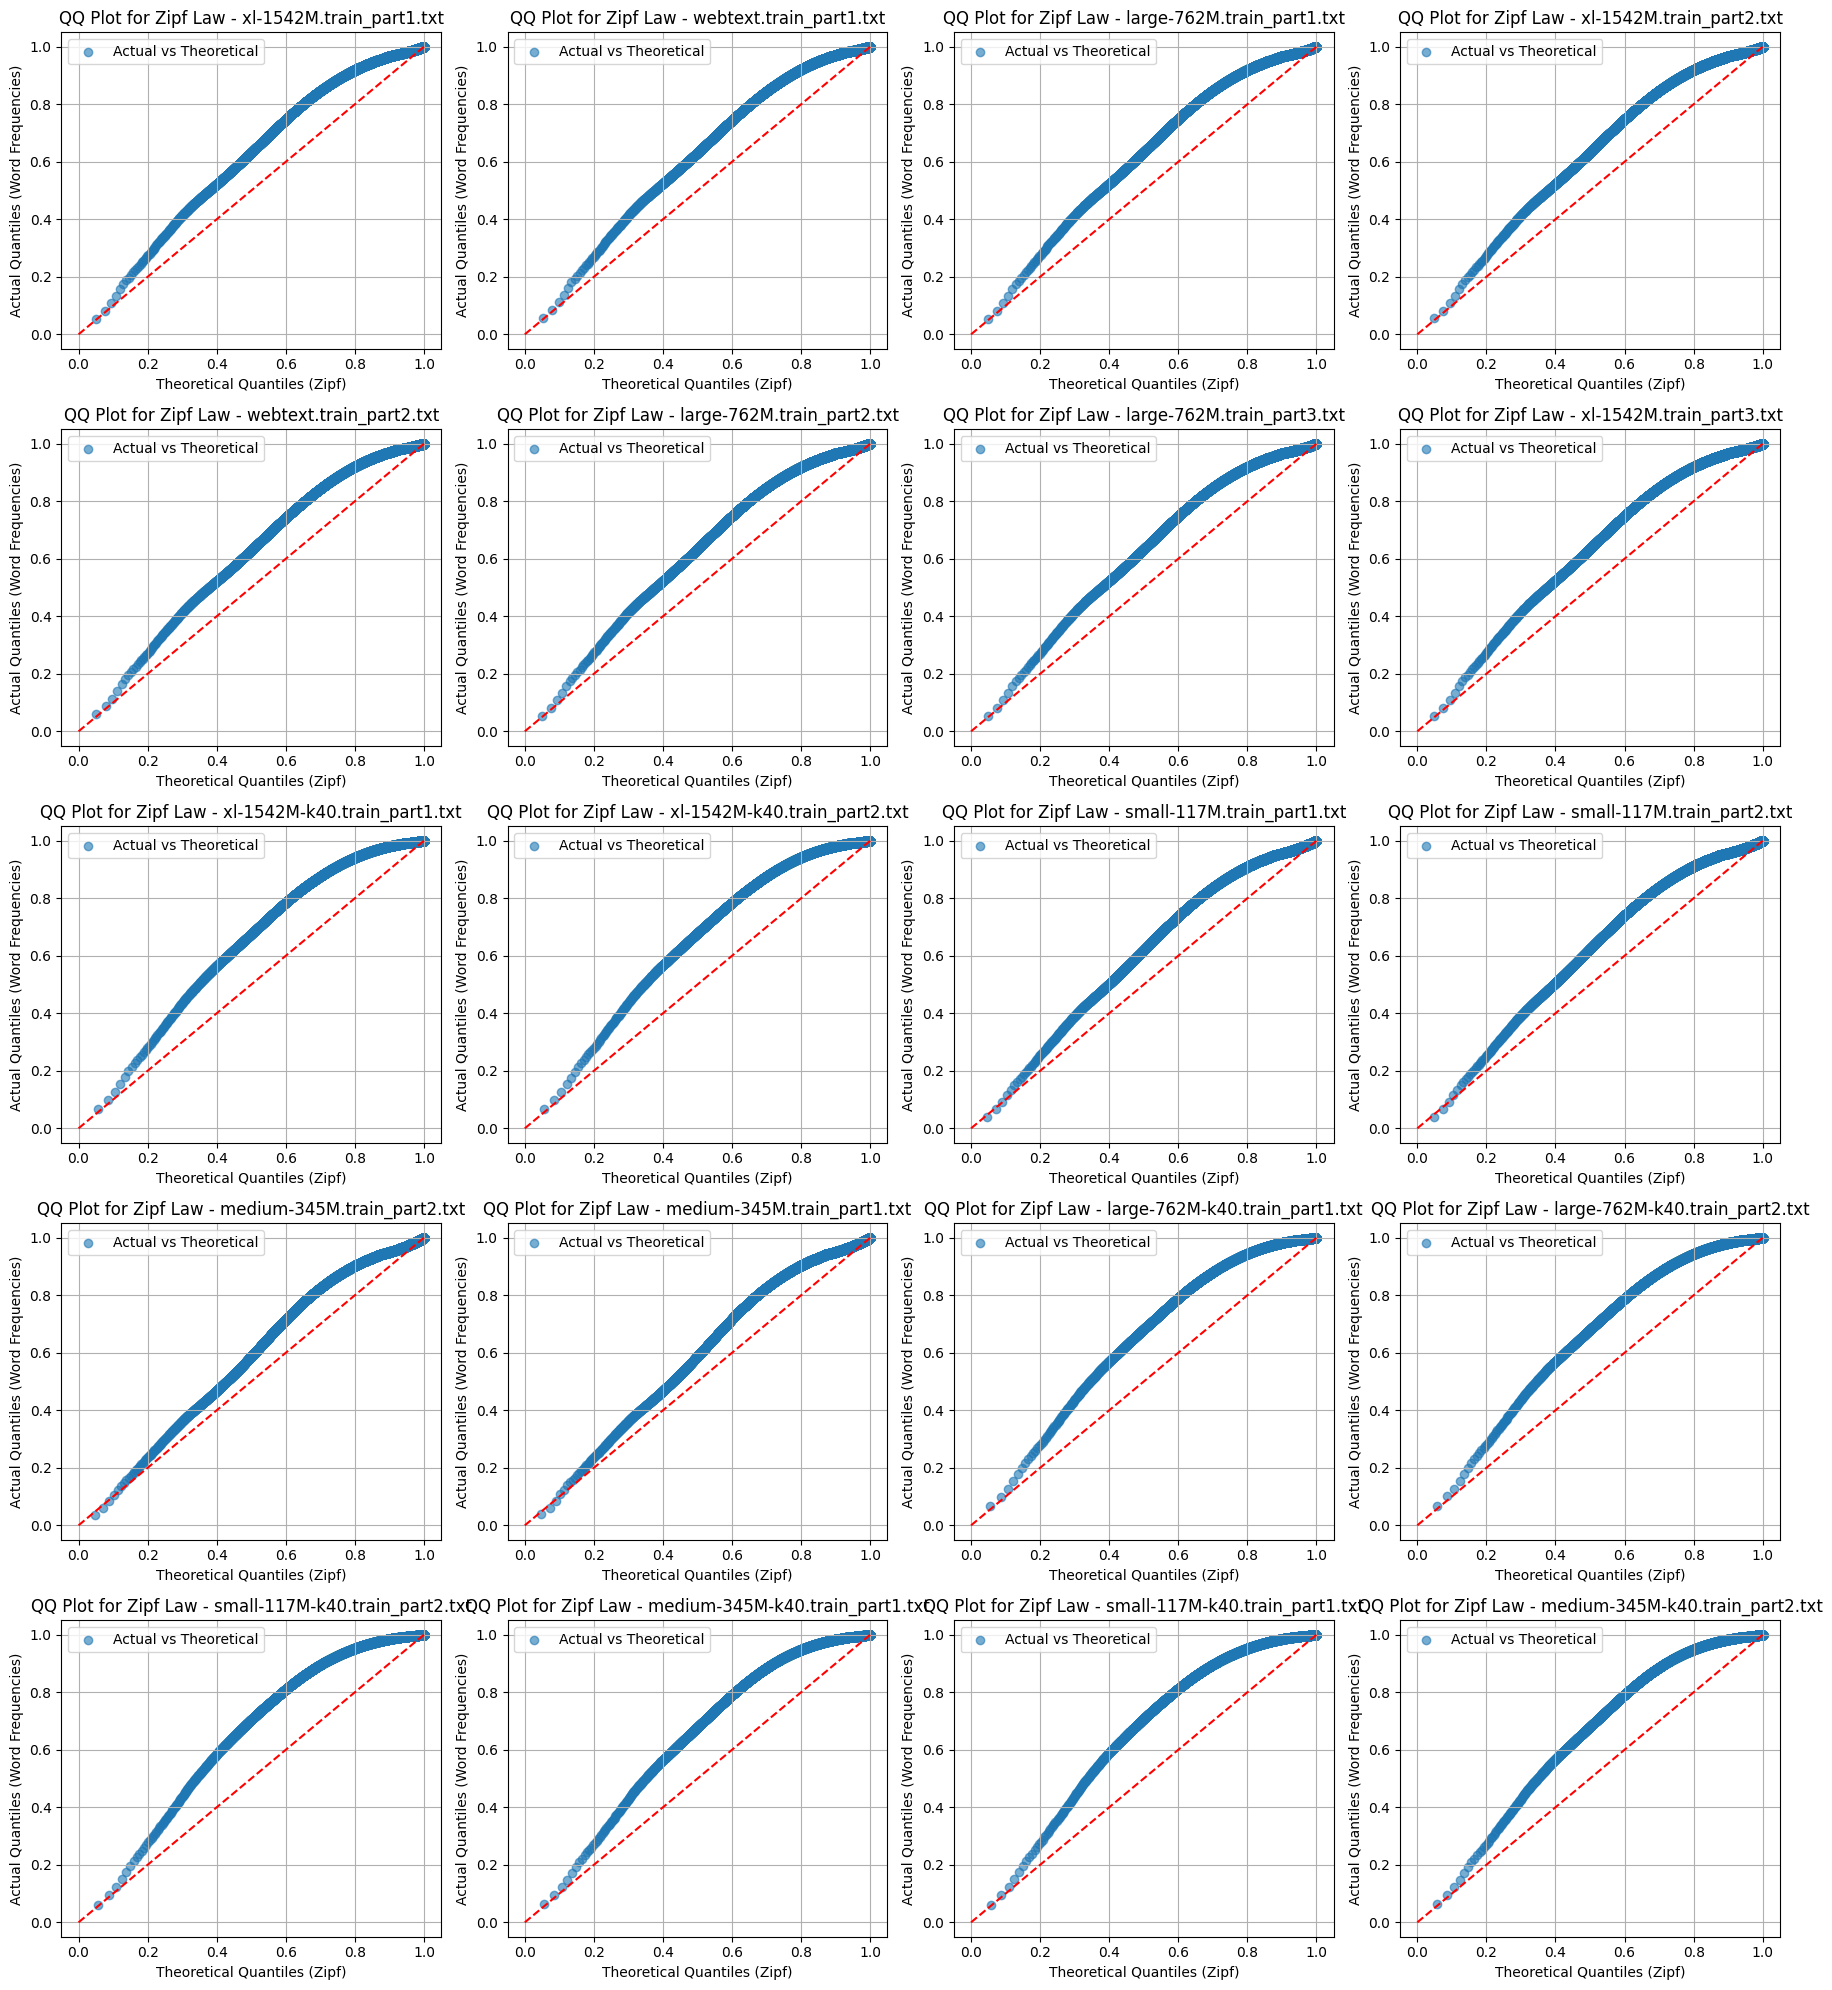

In [40]:
plot_qq_for_zipf_law(AI_frequencies, s=.9, row=5, col=4)  # You can change s by yourself to find the change

Summary of  xl-1542M.train_part1.txt :
Number of unique words:  53064
Number of all words:  818046


Summary of  webtext.train_part1.txt :
Number of unique words:  40750
Number of all words:  832309


Summary of  large-762M.train_part1.txt :
Number of unique words:  54527
Number of all words:  817691


Summary of  xl-1542M.train_part2.txt :
Number of unique words:  53117
Number of all words:  818503


Summary of  webtext.train_part2.txt :
Number of unique words:  41202
Number of all words:  828063


Summary of  large-762M.train_part2.txt :
Number of unique words:  54275
Number of all words:  815590


Summary of  large-762M.train_part3.txt :
Number of unique words:  54316
Number of all words:  816684


Summary of  xl-1542M.train_part3.txt :
Number of unique words:  53148
Number of all words:  821007


Summary of  xl-1542M-k40.train_part1.txt :
Number of unique words:  26086
Number of all words:  882119


Summary of  xl-1542M-k40.train_part2.txt :
Number of unique words:  25638
Number of

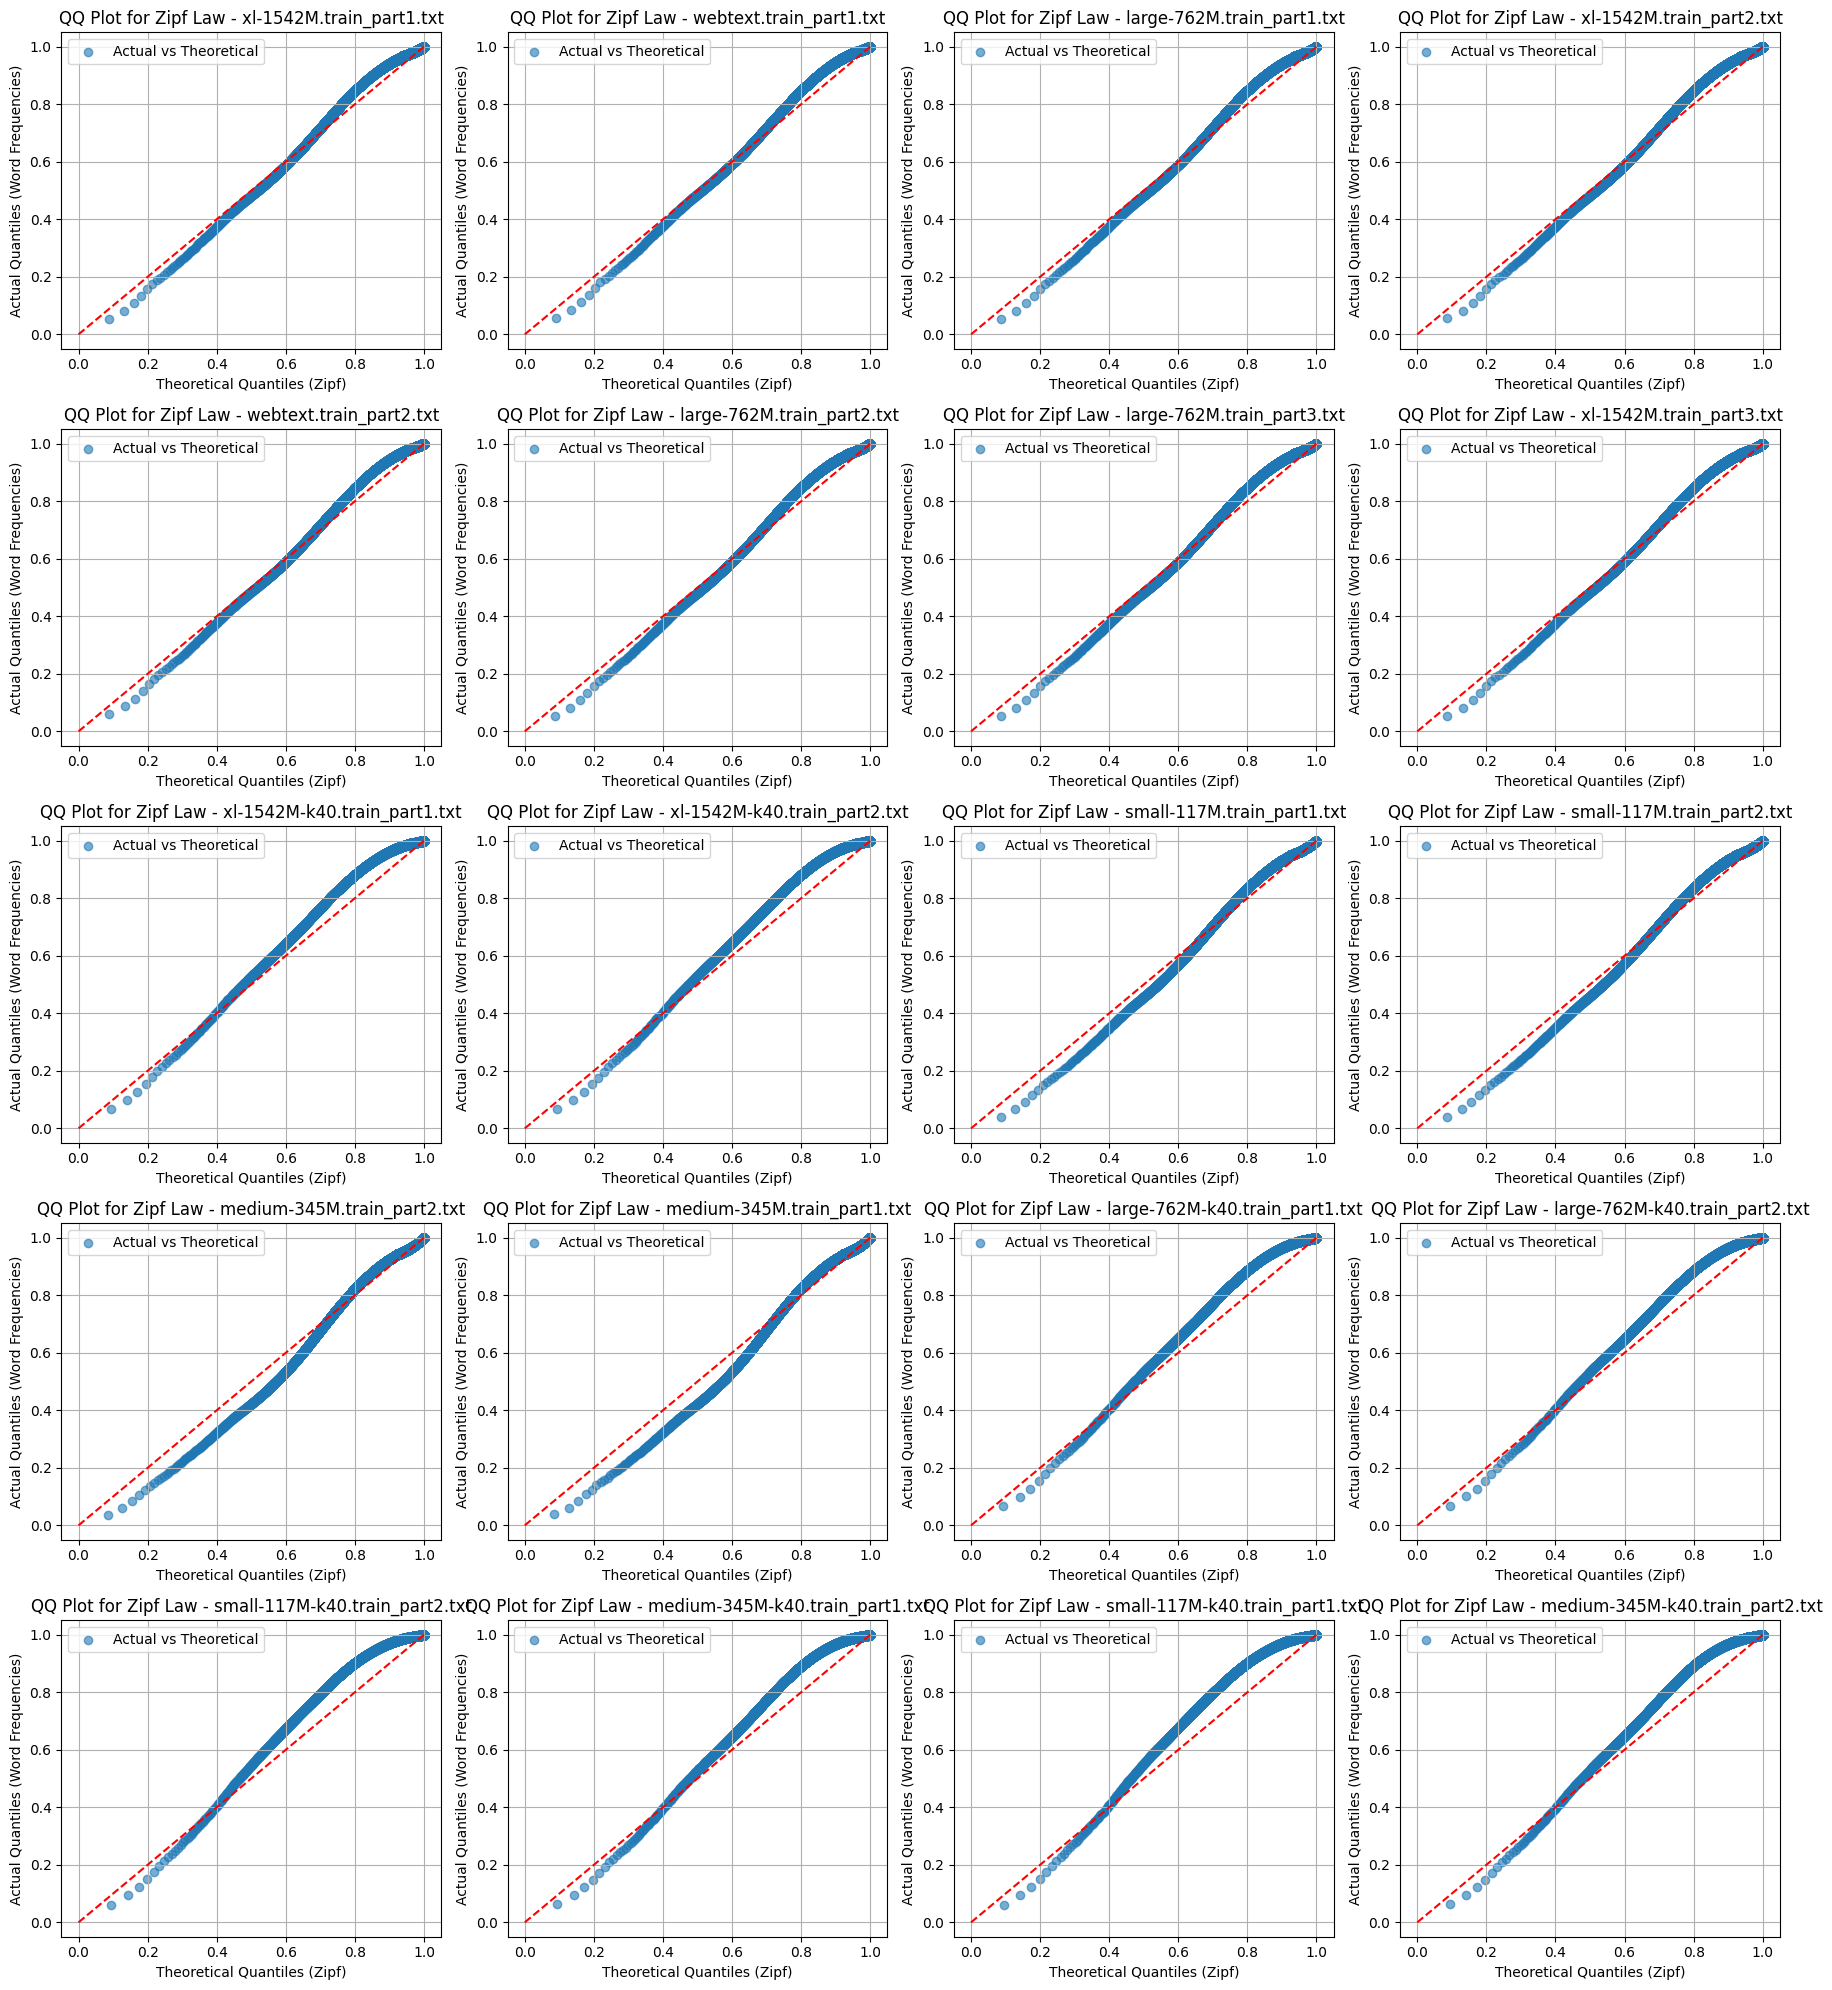

In [41]:
plot_qq_for_zipf_law(AI_frequencies, s=1, row=5, col=4)  # You can change s by yourself to find the change

Summary of  The Metamorphosis.txt :
Number of unique words:  2603
Number of all words:  22169


Summary of  Nineteen Eighty-Four.txt :
Number of unique words:  8659
Number of all words:  103725


Summary of  Don Quixote.txt :
Number of unique words:  14448
Number of all words:  399115


Summary of  Great Expectations.txt :
Number of unique words:  10528
Number of all words:  181983


Summary of  The Three Musketeers.txt :
Number of unique words:  10278
Number of all words:  224434


Summary of  The Great Gatsby.txt :
Number of unique words:  5781
Number of all words:  48554


Summary of  Robinson Crusoe.txt :
Number of unique words:  5961
Number of all words:  121108


Summary of  The Time Machine.txt :
Number of unique words:  4505
Number of all words:  32164




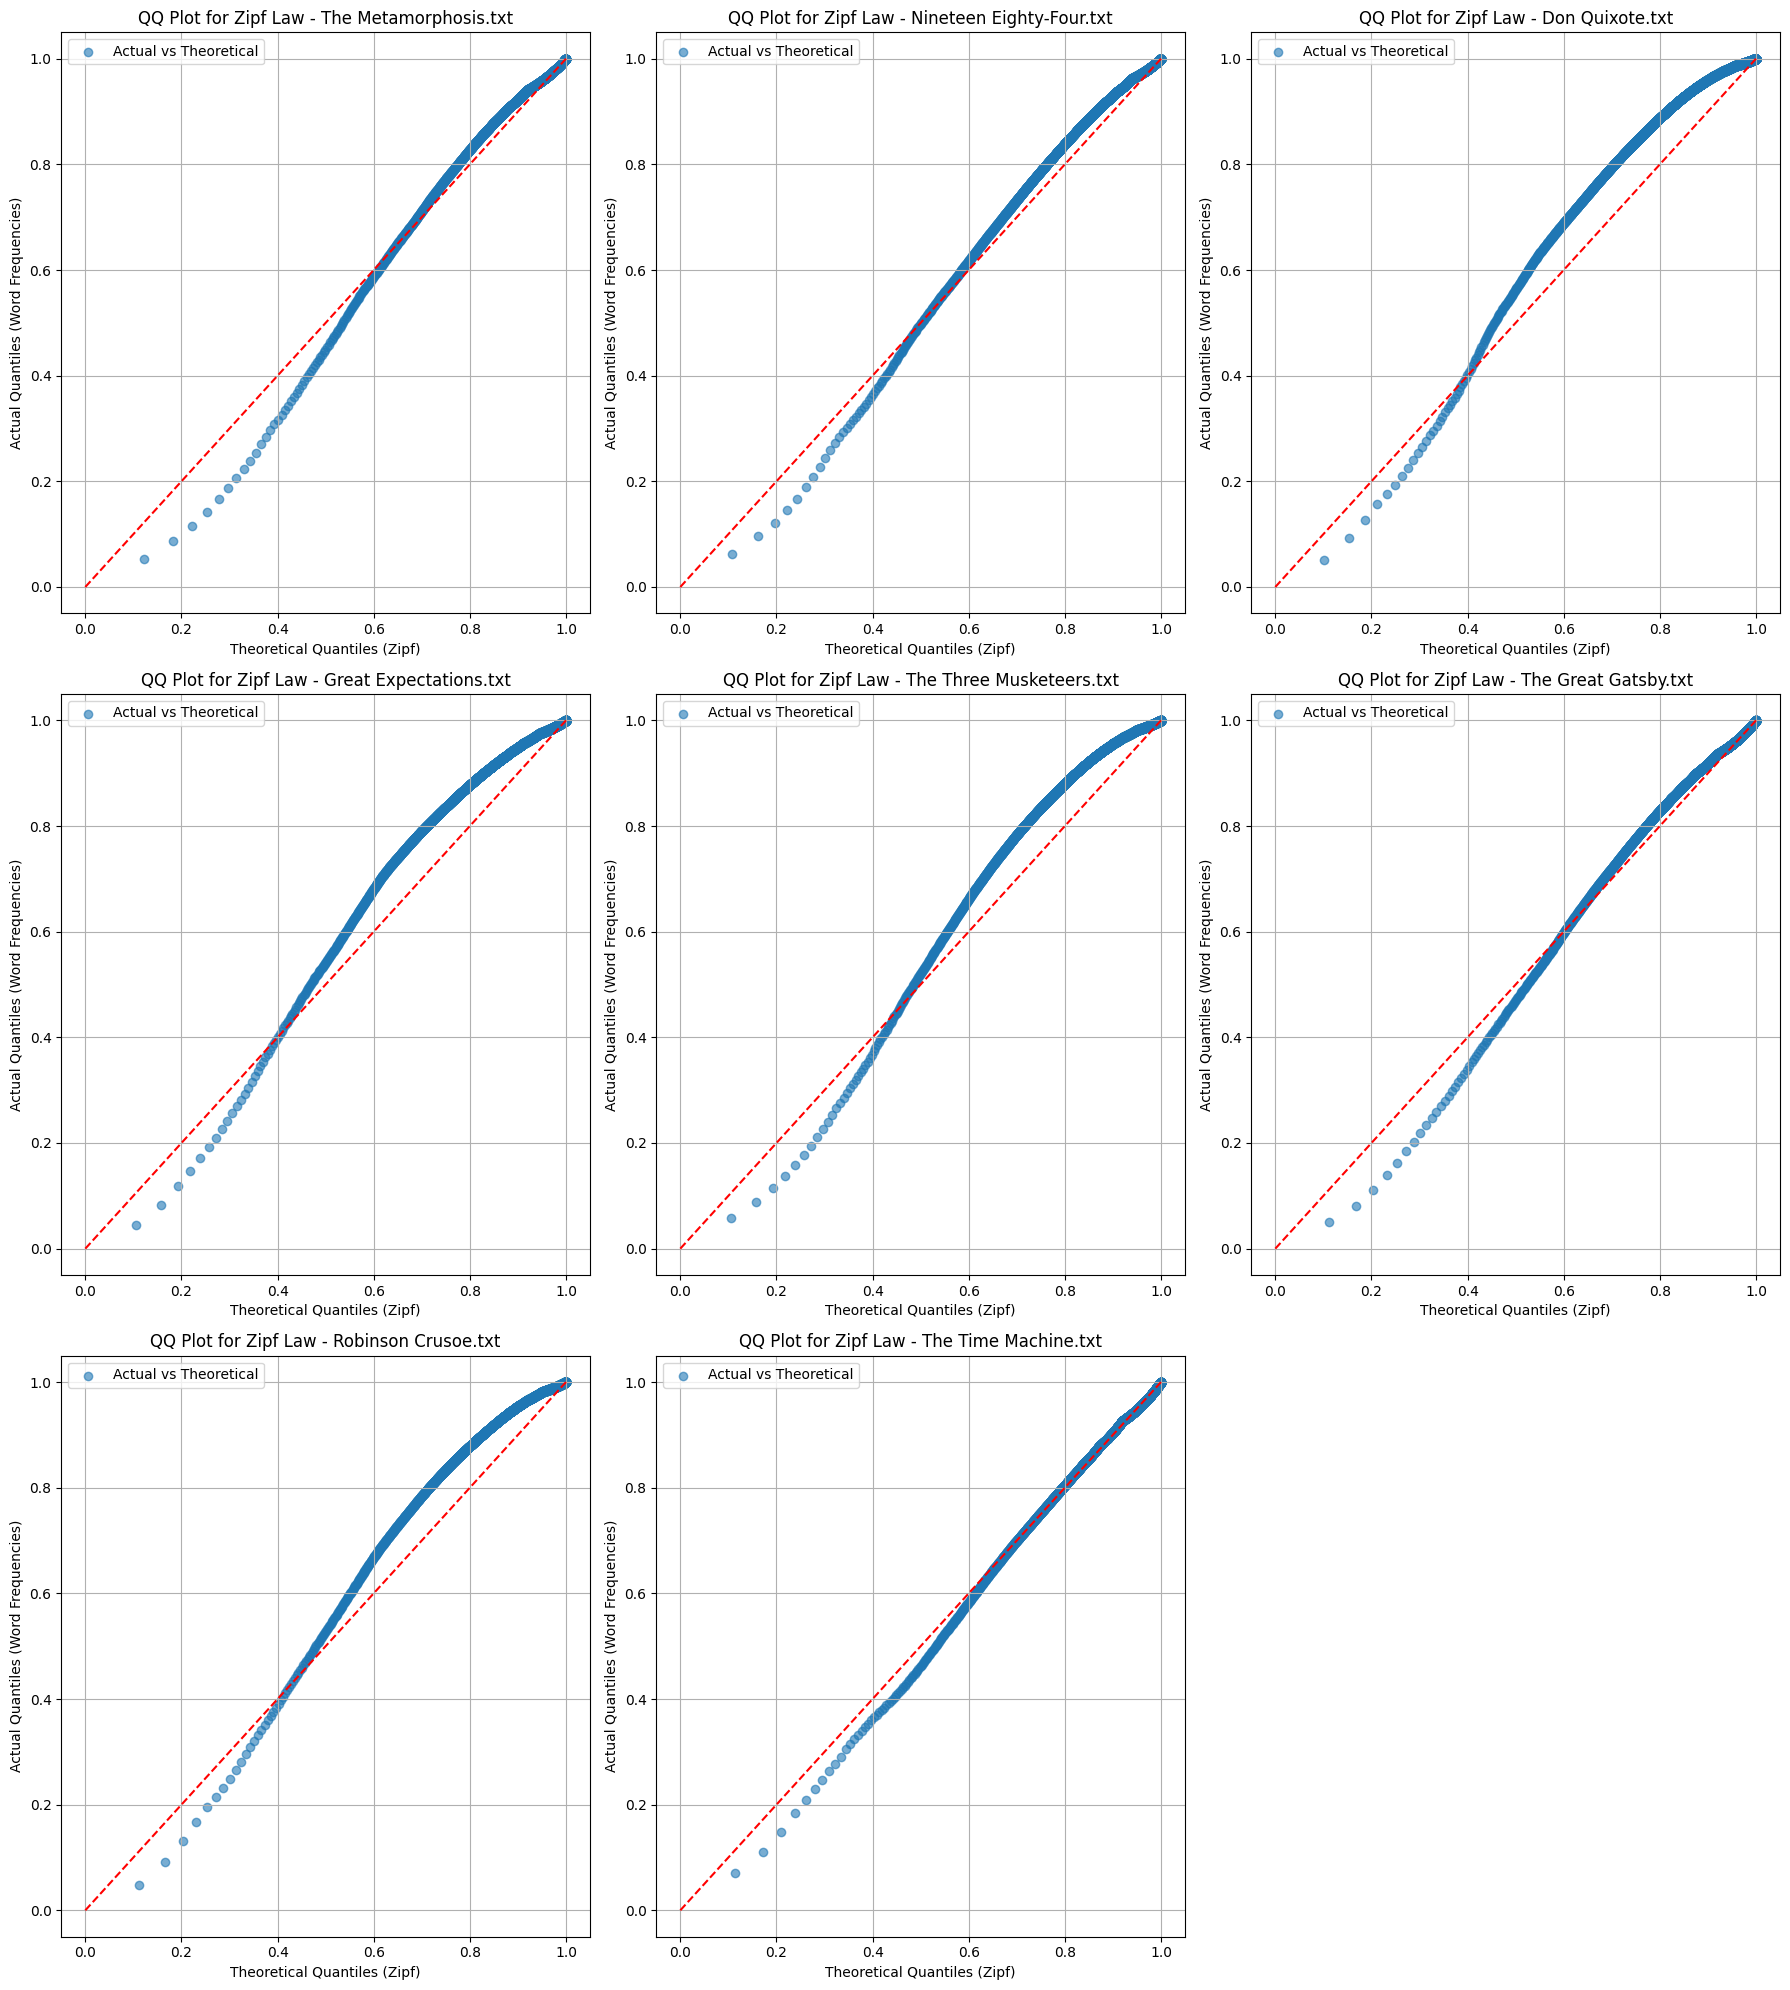

In [44]:
novel_path = '../Resources/novel'

novel_frequencies = read_and_collect_frequencies_from_directory(novel_path)

plot_qq_for_zipf_law(novel_frequencies, s=1.008, row=3, col=3)

Summary of  xl-1542M.train_part1.txt :
Number of unique words:  53064
Number of all words:  818046


Summary of  webtext.train_part1.txt :
Number of unique words:  40750
Number of all words:  832309


Summary of  large-762M.train_part1.txt :
Number of unique words:  54527
Number of all words:  817691


Summary of  xl-1542M.train_part2.txt :
Number of unique words:  53117
Number of all words:  818503


Summary of  webtext.train_part2.txt :
Number of unique words:  41202
Number of all words:  828063


Summary of  large-762M.train_part2.txt :
Number of unique words:  54275
Number of all words:  815590


Summary of  large-762M.train_part3.txt :
Number of unique words:  54316
Number of all words:  816684


Summary of  xl-1542M.train_part3.txt :
Number of unique words:  53148
Number of all words:  821007


Summary of  xl-1542M-k40.train_part1.txt :
Number of unique words:  26086
Number of all words:  882119


Summary of  xl-1542M-k40.train_part2.txt :
Number of unique words:  25638
Number of

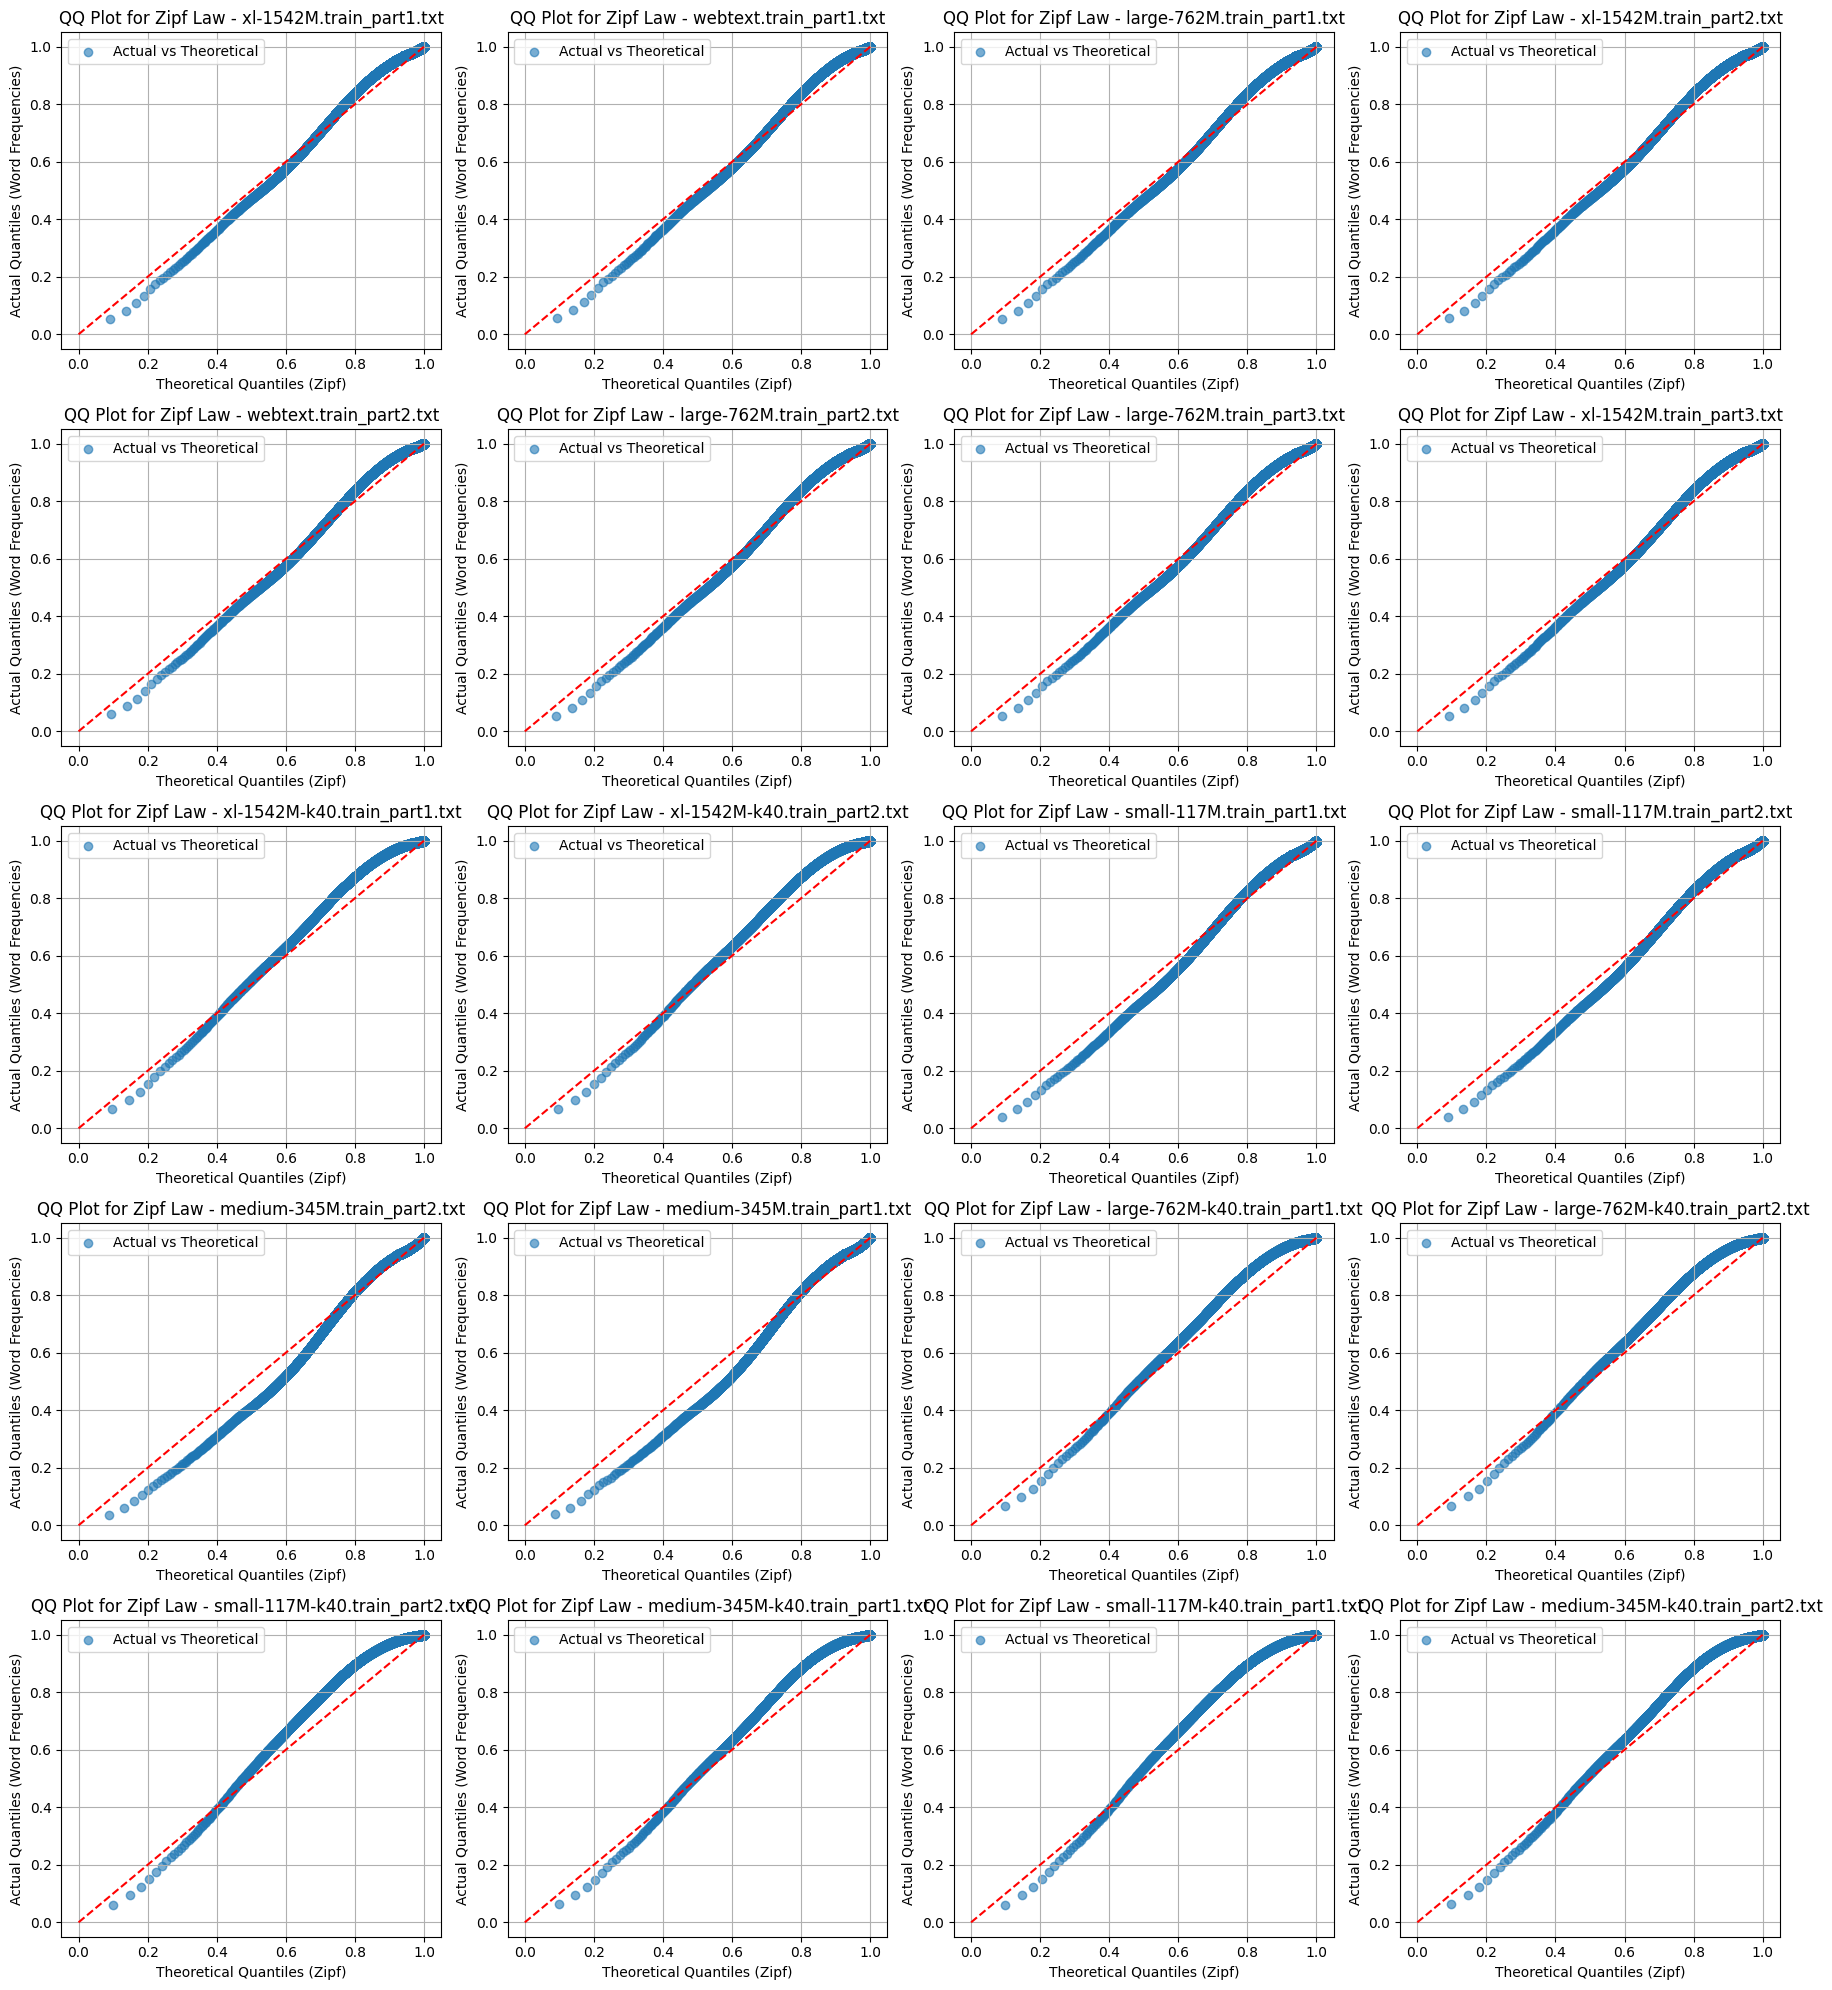

In [42]:
plot_qq_for_zipf_law(AI_frequencies, s=1.008, row=5, col=4)  # You can change s by yourself to find the difference

# Conclusion:
Through this experiment, we found that the text generated by GPT-2 follows Zipf’s Law distribution well in terms of word frequency, with a parameter  $s$  value of 1.008. This is similar to the results observed in some classic novels. This finding indicates that when the text volume is sufficiently large, GPT-2 can generate text with word usage frequencies close to human language, reflecting the model’s effectiveness in learning and simulating the statistical characteristics of natural language.

However, this also implies that relying solely on word frequency features is no longer sufficient to effectively distinguish AI-generated text from human-written text. Therefore, it is necessary to consider other approaches and combine multiple textual features to improve recognition accuracy. Currently, common methods include analyzing syntactic structures, sentence length distributions, textual tone, and the authenticity and consistency of the content.